<a href="https://colab.research.google.com/github/flaghunter21/TensorFlow-Practice/blob/main/01_neural_network_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression with NN in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable on some other combination of variables, even shorter... predicting a number.



In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.2


### Creating data to view and fit

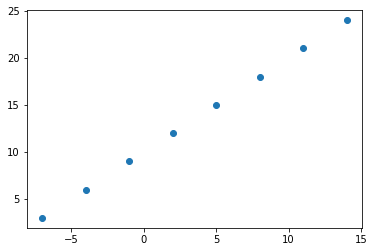

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create label
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and output shapes

In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0].ndim

0

In [6]:
X[0], y[0]

(-7.0, 3.0)

In [7]:
# Turn our NumPy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [8]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

from tensorflow.python.ops.variables import model_variables
### Steps in modeling with TensorFlow

1. Creating a model - define the input and output layers, as well as the hidden layers of a deep learning model_variables
2. Compile a model - define the loss function, optimizer, and evaluation metrics.
3. Fitting a model - letting the model try to find patterns between X & y.

In [9]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)                            
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 760ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 10.9748 - mae: 10.9748


In [10]:
# Try and make a prediction using our model
model.predict([17.0])

array([[12.716021]], dtype=float32)

### Improving a model

* Add layers
* Increase the number of hidden units
* Change activation function
* Change optimization function
* Change learning rate
* Fit on more data
* Fit for longer

In [11]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

# Compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# Fit model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 779ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/100
1/1 [==============================] - 0s 29ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/100
1/1 [==============================] - 0s 34ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/100
1/1 [==============================] - 0s 24ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/100
1/1 [==============================] - 0s 17ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/100
1/1 [==============================] - 0s 15ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/100
1/1 [==============================

In [12]:
model.predict([17.0]) # right answer is 27.0

array([[30.158512]], dtype=float32)

### Evaluating a model

In [13]:
# Make a bigger dataset
X = np.arange(-100, 100, 4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [14]:
# Make labels for the dataset (adhering to same pattern as before)
y = np.arange(-90, 110, 4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [15]:
# Same result as above
y = X + 10
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

#### Split data into train/test set

* Training set - the model learns from this data, which is typically 70-80% of the total data available.
* Validation set - the model gets tuned on this data, which is typically 10-15% of the total data available.
* Test set - the model gets evaluated on this data to test what it has learned, typically 10-15% of the total data available.

In [16]:
# Check how many samples we have
len(X)

50

In [17]:
# Split data into train and test sets
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

#### Visualizing the data

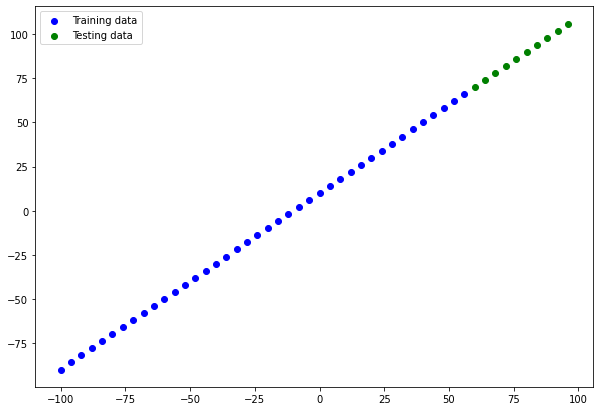

In [18]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();

In [19]:
# Set random seed
tf.random.set_seed(42)
# Create a model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1, input_shape=[1])
])
# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])
# Fit model
model.fit(X_train, y_train, epochs=100, verbose=0)

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


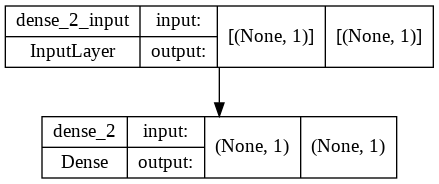

In [21]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

#### Visualizing the predictions

In [22]:
# Make predictions
y_preds = model.predict(X_test)

In [23]:
# View the predictions
y_preds

array([[53.57109 ],
       [57.05633 ],
       [60.541573],
       [64.02681 ],
       [67.512054],
       [70.99729 ],
       [74.48254 ],
       [77.96777 ],
       [81.45301 ],
       [84.938255]], dtype=float32)

If you think you're going to be visualizing something a lot, it is a good idea to functionize it so you can use it later.

In [24]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions
  """
  plt.figure(figsize=(10,7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c='b', label='Training data')
  # Plot test data in green
  plt.scatter(test_data, test_labels, c='g', label='Testing data')
  # Plot predictions in red
  plt.scatter(test_data, predictions, c='r', label='Predictions')
  # Show legend
  plt.legend();

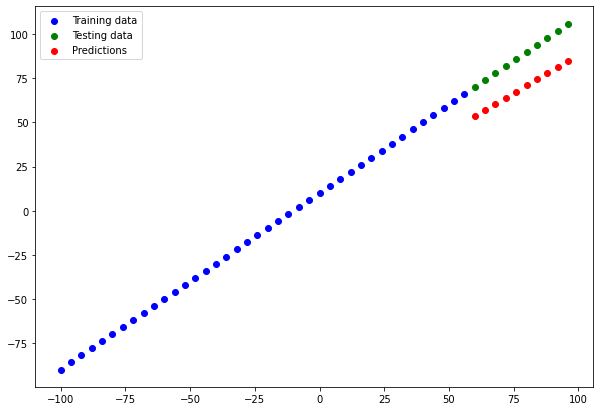

In [25]:
plot_predictions()

#### Evaluating predictions

In [26]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 365ms/step - loss: 18.7453 - mae: 18.7453


[18.74532699584961, 18.74532699584961]

In [27]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=y_preds)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([34.42891 , 30.943668, 27.45843 , 23.97319 , 20.487946, 17.202168,
       14.510478, 12.419336, 11.018796, 10.212349], dtype=float32)>

MAE is not single output because `y_test` and `y_preds` are different shapes.

In [28]:
# Check the test label tensor values
y_test

array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [29]:
# Check the predictions tensor values (Note extra square brackets)
y_preds

array([[53.57109 ],
       [57.05633 ],
       [60.541573],
       [64.02681 ],
       [67.512054],
       [70.99729 ],
       [74.48254 ],
       [77.96777 ],
       [81.45301 ],
       [84.938255]], dtype=float32)

In [30]:
# Check the tensor shapes
y_test.shape, y_preds.shape

((10,), (10, 1))

We can fix this using `squeeze()` which removes dimension from `y_preds` tensor making it the same shape as `y_test`.

In [31]:
# Shape before squeeze()
y_preds.shape

(10, 1)

In [32]:
# Shape after squeeze()
y_preds.squeeze().shape

(10,)

In [33]:
# What do they look like?
y_test, y_preds.squeeze()

(array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106]),
 array([53.57109 , 57.05633 , 60.541573, 64.02681 , 67.512054, 70.99729 ,
        74.48254 , 77.96777 , 81.45301 , 84.938255], dtype=float32))

In [34]:
# Calcualte the MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=y_preds.squeeze())
mae

<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>

In [35]:
# Calculate the MSE
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=y_preds.squeeze())
mse

<tf.Tensor: shape=(), dtype=float32, numpy=353.57336>

In [36]:
# Returns the same as tf.metrics.mean_absolute_error()
tf.reduce_mean(tf.abs(y_test-y_preds.squeeze()))

<tf.Tensor: shape=(), dtype=float64, numpy=18.745327377319335>

Let's make functions for our evaluation metrics.

In [37]:
def mae(y_test, y_pred):
  """
  Calculated the mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test, y_pred)

def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test, y_pred)

#### Running experiments to improve a model

1. **Get more data** - get more examples for your model to train on (more opportunities to learn patterns)
2. **Make your model larger (use a more complex model)** - this might come in the form of more layers or more hidden units in each layer.
3. **Train for longer** - give your model more of a chance to find the patterns in the data.

We will build 3 models and compare the results:

`model_1` - same as original model, 1 layer, trained for 100 epochs.

`model_2` - 2 layers, trained for 100 epochs.

`model_3` - 3 layers, trained for 500 epochs.

In [38]:
# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

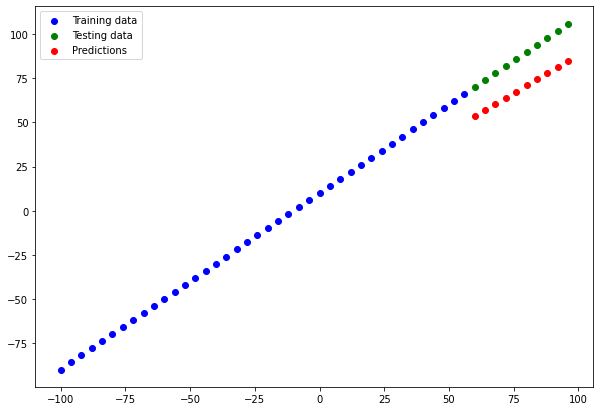

In [39]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [40]:
# Calculate model_1 metrics
mae_1 = mae(y_test, y_preds_1.squeeze()).numpy()
mse_1 = mse(y_test, y_preds_1.squeeze()).numpy()
mae_1, mse_1

(18.745327, 353.57336)

This time we will add an extra dense layer.

In [41]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_1 with extra layer
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1),
                               tf.keras.layers.Dense(1) # add a second layer
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

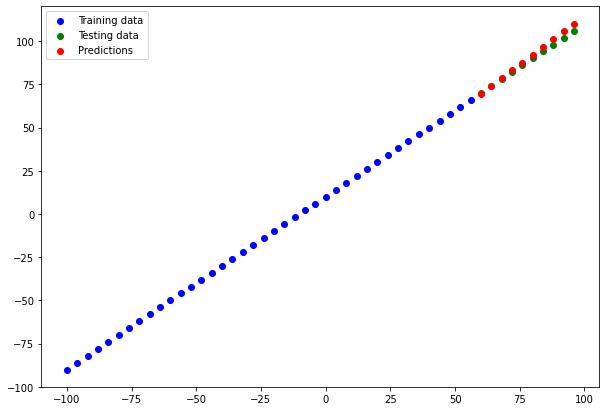

In [42]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [43]:
# Calculate model_2 metrics
mae_2 = mae(y_test, y_preds_2.squeeze()).numpy()
mse_2 = mse(y_test, y_preds_2.squeeze()).numpy()
mae_2, mse_2

(1.9098114, 5.459232)

For our 3rd model, we will keep everything the same as `model_2` except this time we'll train for longer (500 epochs instead of 100).

This will give our mdoel more of a chance to learn the patterns in the data.

In [44]:
# Set random seed
tf.random.set_seed(42)

# Replicate_model_2
model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1),
                               tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model (this time for 500 epochs, not 100)
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0)

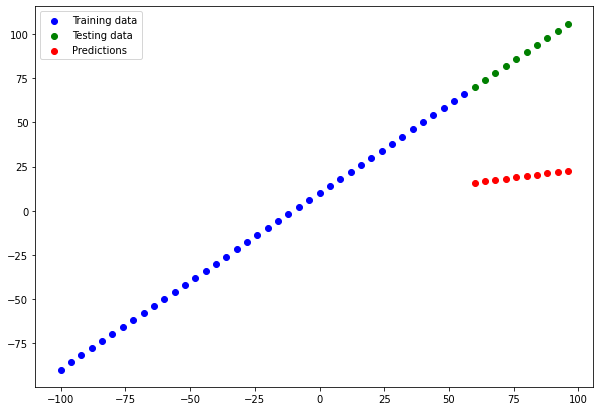

In [45]:
# Make and plot predictions for model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

As it turns out, our model might have trained too long and has thus resulted in worse results.

In [46]:
# Calculate model_3 metrics
mae_3 = mae(y_test, y_preds_3.squeeze()).numpy()
mse_3 = mse(y_test, y_preds_3.squeeze()).numpy()
mae_3, mse_3

(68.68786, 4804.4717)

#### Compare results

In [47]:
model_results = [["model_1",mae_1, mse_1],
                 ["model_2",mae_2, mse_2],
                 ["model_3",mae_3, mse_3]]

In [48]:
import pandas as pd
all_results = pd.DataFrame(model_results, columns=["model","mae","mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,1.909811,5.459232
2,model_3,68.687859,4804.471680


### Tracking your experiments

One really good habit to get into is tracking your modelling experiments to see which perform better than others.

Resources:

* Tensorboard

* Weights & Biases

### Saving a model

Once you've trained a model and found one which performs to your liking, you'll probably want to save it for use elsewhere (like a web app or mobile device).

You can save a Tensorflow/Keras mdoel using `model.save()`,

There are two ways to save a model in TensorFlow:

1. The `SavedModel format` (default)

2. The `HDF5 format`

The main difference between the two is SavedModel is automatically able to save custom objects (such as special layers) without additional modificaitons when loading the model back in.

SavedModel format will suffice most of the time.

In [49]:
# Save a model using the SavedModel format
model_2.save('best_model_SavedModel_format')

INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


In [50]:
# Check it out - outputs a protobuf binary file (.pb) as well as other files
!ls best_model_SavedModel_format

assets	keras_metadata.pb  saved_model.pb  variables


In [51]:
# Save a model using the HDF5 format
model_2.save("best_model_HDF5_format.h5") # note the addition of 'h5' on the end

In [52]:
# Check it out
!ls best_model_HDF5_format.h5

best_model_HDF5_format.h5


### Loading a model

We can load a saved model using the `load_model()` method.

In [53]:
# Load a model from the SavedModel format
loaded_saved_model = tf.keras.models.load_model('best_model_SavedModel_format')
loaded_saved_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [54]:
# Load a model from the HDF5 format
loaded_h5_model = tf.keras.models.load_model('best_model_HDF5_format.h5')
loaded_h5_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


### A larger example

Let's step it up a notch and build a model for a more feature rich dataset.

More specifically, we're going to try to predict the cost of medical insurance for individuals based on a number of different parameters such as `age`, `sex`, `bmi`, `children`, `smoking_status`, and `residential_region`.

In [55]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [57]:
# Check out the insurance dataset
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


We have to turn the non-numerical columns into numbers (because a neural network can't handle non-numerical inputs)

To do so, we use `get_dummies()` method in pandas.

In [58]:
# Turn all categories into numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [59]:
# Create X and y values
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [60]:
# View features
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
# Set random seed
tf.random.set_seed(42)

# Create a new model
insurance_model = tf.keras.Sequential([
                                       tf.keras.layers.Dense(1),
                                       tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

# Fit the model
insurance_model.fit(X_train, y_train, epochs=100, verbose=0)

In [63]:
# Check the results of the insurance model
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8628.2393 - mae: 8628.2393


[8628.2392578125, 8628.2392578125]

The model did not perform very well.

We will try 3 things:

* Increase the number of layers from 2 to 3.
* Increase the number of units in each layer
* Change the optimizer (SGD to Adam)

In [64]:
# Set random seed
tf.random.set_seed(42)

# Add extra layer and increase number of units
insurance_model_2 = tf.keras.Sequential([
                                         tf.keras.layers.Dense(100),
                                         tf.keras.layers.Dense(10),
                                         tf.keras.layers.Dense(1) # Output layer
])

# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model and save the history
history = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [65]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4924.3477 - mae: 4924.3477


[4924.34765625, 4924.34765625]

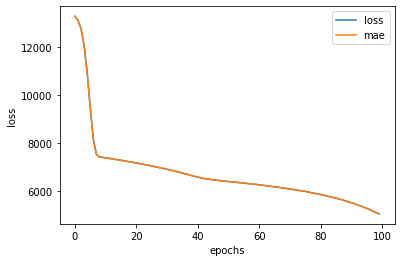

In [66]:
# Plot history (loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

Let's train the same model but for longer.

In [67]:
# Try 100 more epochs
history_2 = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [68]:
# Evaluate the model trained for 200 total epochs
insurance_model_2_loss, insurance_model_2_mae = insurance_model_2.evaluate(X_test, y_test)
insurance_model_2_loss, insurance_model_2_mae

9/9 [==============================] - 0s 4ms/step - loss: 3494.7285 - mae: 3494.7285


(3494.728515625, 3494.728515625)

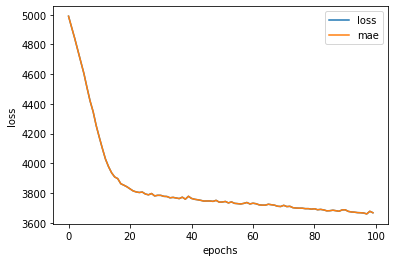

In [69]:
# Plot model trained for 200 epochs
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

### Preprocessing data (normalization and standardization)

A common practice when working with neural networks is to make sure all of the data you pass to them is in the range 0 to 1.

This practice is called **normalization** (scaling all values from original range to be between 0 and 1).

There is another process called **standardization** which converts all of your data to unit variance and 0 mean.

These two practices are often part of a preprocessing pipeline.

To do this to our insurance data, we use a few classes from Scikit-Learn:
* `make_column_transformer` - build a multi-step data preprocessing function for the following transformations:
* `MinMaxScaler` - make sure all numerical columns are normalized (between 0 and 1),
* `OneHotEncoder` - one hot encode. the non-numerical columns.

In [70]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
# Check out the data
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [71]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']), # gets all values between 0 and 1
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])
)

# Create X and y
X = insurance.drop('charges', axis=1)
y = insurance['charges']

# Train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on training data (doing so on test dat would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [72]:
# Notice normalized shape is larger because of extra columns
X_train_normal.shape, X_train.shape

((1070, 11), (1070, 6))

We can now model this data.

In [73]:
# Set random seed
tf.random.set_seed(42)

# Build the model
insurance_model_3 = tf.keras.Sequential([
                             tf.keras.layers.Dense(100),
                             tf.keras.layers.Dense(10),
                             tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model for 200 epochs
insurance_model_3.fit(X_train_normal, y_train, epochs=200, verbose=0)

In [74]:
# Evaluate model
insurance_model_3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3171.5771 - mae: 3171.5771


[3171.5771484375, 3171.5771484375]

One of the main benefits of normalization: faster convergence time (your model gets to better results faster).

## Exercises

1. Create your own regression dataset and build fit a model to it.

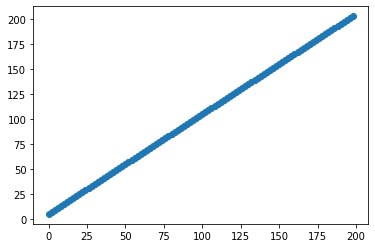

In [75]:
X = np.arange(0,200,2)
y = X + 5
plt.scatter(X, y);

In [76]:
# Split data into train and test sets
X_train2 = X[:80]
y_train2 = y[:80]

X_test2 = X[80:]
y_test2 = y[80:]

len(X_train2), len(X_test2)

(80, 20)

In [77]:
# Set random seed
tf.random.set_seed(42)
# Create a model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1, input_shape=[1])
])
# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])
# Fit model
model.fit(X_train2, y_train2, epochs=100, verbose=0)

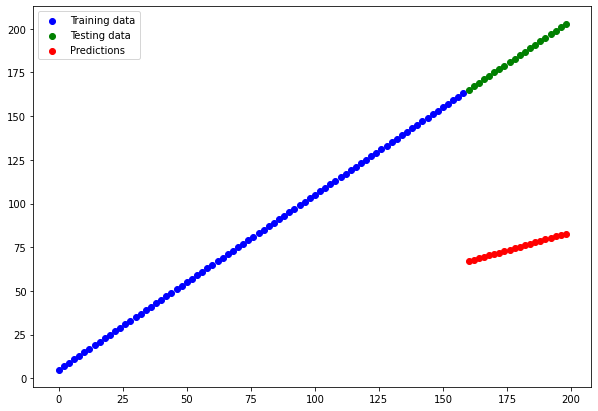

In [78]:
y_preds2 = model.predict(X_test2)
plot_predictions(X_train2, y_train2, X_test2, y_test2, y_preds2)

In [80]:
mae(y_test2, y_preds2.squeeze()).numpy()

109.11916

2. Try building a neural net with 4 Dense layers and fitting it to your own regression dataset, how does it perform?

In [95]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100, input_shape=[1]),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)

])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

model_2.fit(X_train2, y_train2, epochs=100, verbose=0)

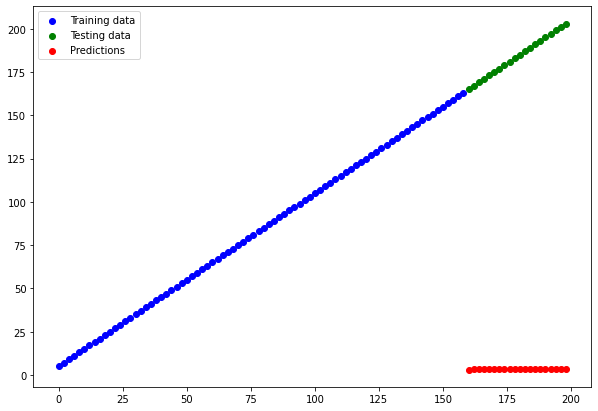

In [96]:
y_preds3 = model_2.predict(X_test2)
plot_predictions(X_train2, y_train2, X_test2, y_test2, y_preds3) # IDK

3. Try and improve the results we got on the insurance dataset, some things you might want to try include:
* Building a larger model (how does one with 4 dense layers go?).
* Increasing the number of units in each layer.
* Lookup the documentation of Adam and find out what the first parameter is, what happens if you increase it by 10x?
* What happens if you train for longer (say 300 epochs instead of 200)?

In [97]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [98]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']), # gets all values between 0 and 1
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])
)

# Create X and y
X = insurance.drop('charges', axis=1)
y = insurance['charges']

# Train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on training data (doing so on test dat would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [100]:
# Set random seed
tf.random.set_seed(42)

# Build the model
insurance_model_4 = tf.keras.Sequential([
                             tf.keras.layers.Dense(1000),
                             tf.keras.layers.Dense(100),
                             tf.keras.layers.Dense(10),
                             tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model for 200 epochs
insurance_model_4.fit(X_train_normal, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 6ms/step - loss: 13303.1553 - mae: 13303.1553
Epoch 2/200
34/34 [==============================] - 0s 6ms/step - loss: 12620.8076 - mae: 12620.8076
Epoch 3/200
34/34 [==============================] - 0s 6ms/step - loss: 9736.9062 - mae: 9736.9062
Epoch 4/200
34/34 [==============================] - 0s 6ms/step - loss: 7884.0020 - mae: 7884.0020
Epoch 5/200
34/34 [==============================] - 0s 7ms/step - loss: 7571.4170 - mae: 7571.4170
Epoch 6/200
34/34 [==============================] - 0s 8ms/step - loss: 7237.5381 - mae: 7237.5381
Epoch 7/200
34/34 [==============================] - 0s 6ms/step - loss: 6786.6162 - mae: 6786.6162
Epoch 8/200
34/34 [==============================] - 0s 8ms/step - loss: 6169.7329 - mae: 6169.7329
Epoch 9/200
34/34 [==============================] - 0s 7ms/step - loss: 5275.5713 - mae: 5275.5713
Epoch 10/200
34/34 [==============================] - 0s 7ms/step - loss: 4267.9839 - mae: 4267.

In [103]:
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 1s 3ms/step - loss: 3173.7422 - mae: 3173.7422


[3173.7421875, 3173.7421875]

In [105]:
# Set random seed
tf.random.set_seed(42)

# Build the model
insurance_model_5 = tf.keras.Sequential([
                             tf.keras.layers.Dense(1000),
                             tf.keras.layers.Dense(100),
                             tf.keras.layers.Dense(10),
                             tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_5.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                          metrics=['mae'])

# Fit the model for 200 epochs
insurance_model_5.fit(X_train_normal, y_train, epochs=200, verbose=0)

In [106]:
insurance_model_5.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3180.6008 - mae: 3180.6008


[3180.600830078125, 3180.600830078125]

In [107]:
# Set random seed
tf.random.set_seed(42)

# Build the model
insurance_model_6 = tf.keras.Sequential([
                             tf.keras.layers.Dense(100),
                             tf.keras.layers.Dense(10),
                             tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_6.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model for 200 epochs
insurance_model_6.fit(X_train_normal, y_train, epochs=300, verbose=0)

In [108]:
insurance_model_6.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3161.5598 - mae: 3161.5598


[3161.559814453125, 3161.559814453125]